# 実験結果の評価

## 10月2日実験：高度80m

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import gistool
from math import pi, cos, sin
%matplotlib notebook

In [3]:
test = pd.read_csv('test.csv', usecols=['file', 'lat_deg', 'lon_deg', 'point'])
test.head()

,file,lat_deg,lon_deg,point
0,DJI_0203.JPG,35.699359,139.235740,5
1,DJI_0205.JPG,35.699338,139.235715,5
2,DJI_0211.JPG,35.699229,139.235446,0
3,DJI_0211.JPG,35.699329,139.235452,1
4,DJI_0211.JPG,35.699356,139.235740,5


In [4]:
ref = pd.read_csv('ref_point.csv', index_col=0)
ref.head()

,real_lat,real_lon
point,,
0,35.699255,139.235553
1,35.699341,139.235550
2,35.699311,139.235479
3,35.699468,139.235298
4,35.699434,139.235482


In [6]:
test = pd.merge(test, ref, left_on='point', right_index=True)

In [7]:
test.head()

,file,lat_deg,lon_deg,point,real_lat,real_lon
0,DJI_0203.JPG,35.699359,139.235740,5,35.699384,139.235803
1,DJI_0205.JPG,35.699338,139.235715,5,35.699384,139.235803
4,DJI_0211.JPG,35.699356,139.235740,5,35.699384,139.235803
8,DJI_0215.JPG,35.699338,139.235778,5,35.699384,139.235803
12,DJI_0218.JPG,35.699315,139.235741,5,35.699384,139.235803


In [8]:
POLE_RADIUS = 6356752.314   #極半径
EQUATOR_RADIUS = 6378137    #赤道半径
MYLATITUDE = 35.699329533
MYLONGITUDE = 139.23547021

def d_lat2dy(d_lat):
	dy = POLE_RADIUS * d_lat * pi / 180
	return dy

def d_lon2dx(d_lon):
	dx = EQUATOR_RADIUS * cos(MYLATITUDE * pi / 180) * d_lon * pi / 180
	return dx

In [9]:
test['d_lat'] = test.lat_deg - test.real_lat
test['d_lon'] = test.lon_deg - test.real_lon
test.head()

,file,lat_deg,lon_deg,point,real_lat,real_lon,d_lat,d_lon
0,DJI_0203.JPG,35.699359,139.235740,5,35.699384,139.235803,-0.000025,-0.000063
1,DJI_0205.JPG,35.699338,139.235715,5,35.699384,139.235803,-0.000046,-0.000088
4,DJI_0211.JPG,35.699356,139.235740,5,35.699384,139.235803,-0.000028,-0.000063
8,DJI_0215.JPG,35.699338,139.235778,5,35.699384,139.235803,-0.000046,-0.000025
12,DJI_0218.JPG,35.699315,139.235741,5,35.699384,139.235803,-0.000069,-0.000062


In [10]:
test['dx'] = test.d_lon.map(d_lon2dx)
test['dy'] = test.d_lat.map(d_lat2dy)

In [14]:
test = test.sort_index()

In [15]:
test.head()

,file,lat_deg,lon_deg,point,real_lat,real_lon,d_lat,d_lon,dx,dy
0,DJI_0203.JPG,35.699359,139.235740,5,35.699384,139.235803,-0.000025,-0.000063,-5.686253,-2.720402
1,DJI_0205.JPG,35.699338,139.235715,5,35.699384,139.235803,-0.000046,-0.000088,-7.937250,-5.059149
2,DJI_0211.JPG,35.699229,139.235446,0,35.699255,139.235553,-0.000026,-0.000107,-9.672959,-2.907901
3,DJI_0211.JPG,35.699329,139.235452,1,35.699341,139.235550,-0.000012,-0.000098,-8.832225,-1.347997
4,DJI_0211.JPG,35.699356,139.235740,5,35.699384,139.235803,-0.000028,-0.000063,-5.677213,-3.088744


In [17]:
test['displace'] = np.sqrt(test.dx ** 2 + test.dy ** 2)
test.head()

,file,lat_deg,lon_deg,point,real_lat,real_lon,d_lat,d_lon,dx,dy,displace
0,DJI_0203.JPG,35.699359,139.235740,5,35.699384,139.235803,-0.000025,-0.000063,-5.686253,-2.720402,6.303496
1,DJI_0205.JPG,35.699338,139.235715,5,35.699384,139.235803,-0.000046,-0.000088,-7.937250,-5.059149,9.412488
2,DJI_0211.JPG,35.699229,139.235446,0,35.699255,139.235553,-0.000026,-0.000107,-9.672959,-2.907901,10.100595
3,DJI_0211.JPG,35.699329,139.235452,1,35.699341,139.235550,-0.000012,-0.000098,-8.832225,-1.347997,8.934500
4,DJI_0211.JPG,35.699356,139.235740,5,35.699384,139.235803,-0.000028,-0.000063,-5.677213,-3.088744,6.463056


In [18]:
test[['dx', 'dy', 'displace']].describe()

,dx,dy,displace
count,30.000000,30.000000,30.000000
mean,-5.724523,-4.182711,7.346564
std,1.847333,2.174966,2.075699
min,-10.043605,-8.725923,3.366387
25%,-6.725870,-5.616654,6.096196
50%,-5.595852,-3.708933,7.065890
75%,-4.585615,-2.724285,8.861552
max,-2.260037,-0.178623,11.566105


<IPython.core.display.Javascript object>


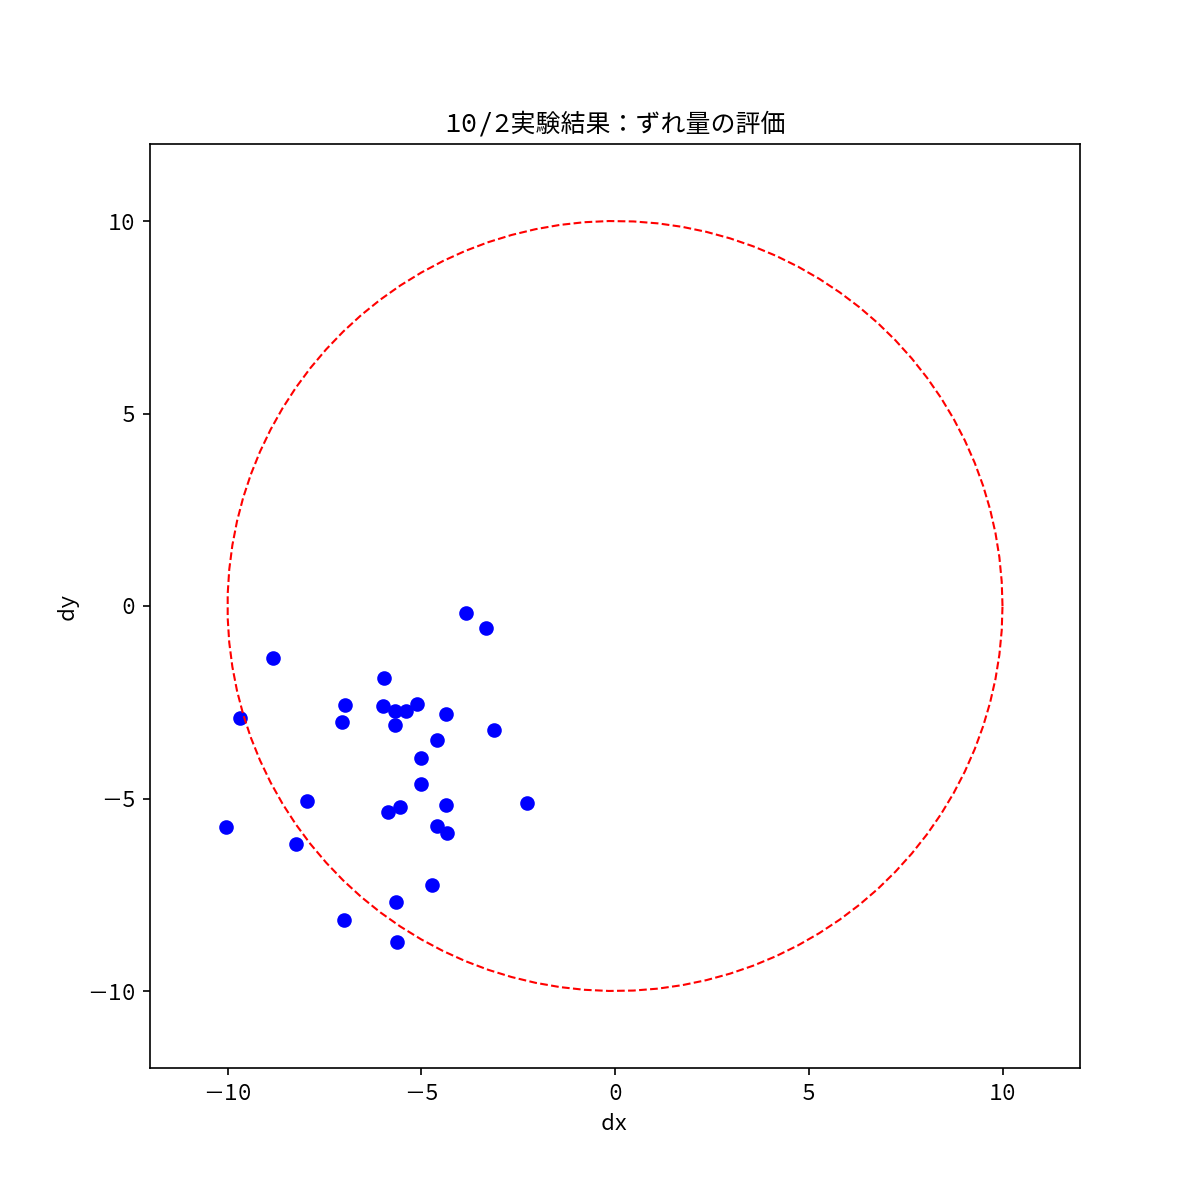

In [44]:
theta = np.linspace(0, 2*np.pi, 100)
tol_dia = 10 # 許容誤差範囲

x = tol_dia * np.cos(theta)
y = tol_dia * np.sin(theta)

fig = plt.figure(figsize=(8,8))
plt.plot(test.dx, test.dy, 'bo')
plt.plot(x, y, 'r--', linewidth=1)
plt.xlim(-12,12)
plt.ylim(-12,12)
plt.title('10/2実験結果：ずれ量の評価')
plt.xlabel('dx')
plt.ylabel('dy')
plt.savefig('analysis/result_displace.jpg')
plt.show()

In [31]:
cnt = test.displace[test.displace>10].count()
total = test.displace.count()
print('Total Count: ', total)
print('Number of precision error: ', cnt)
print('Precision Error Rate: {:.3f}'.format(cnt/total))

Total Count:  30
Number of precision error:  5
Precision Error Rate: 0.167


In [32]:
dx_mean = test.dx.mean()
dy_mean = test.dy.mean()
dx_mean, dy_mean

(-5.724523358420961, -4.182710894157426)

In [33]:
test['dx_corr'] = test.dx - dx_mean
test['dy_corr'] = test.dy - dy_mean
test.head()

,file,lat_deg,lon_deg,point,real_lat,real_lon,d_lat,d_lon,dx,dy,displace,dx_corr,dy_corr
0,DJI_0203.JPG,35.699359,139.235740,5,35.699384,139.235803,-0.000025,-0.000063,-5.686253,-2.720402,6.303496,0.038270,1.462309
1,DJI_0205.JPG,35.699338,139.235715,5,35.699384,139.235803,-0.000046,-0.000088,-7.937250,-5.059149,9.412488,-2.212727,-0.876438
2,DJI_0211.JPG,35.699229,139.235446,0,35.699255,139.235553,-0.000026,-0.000107,-9.672959,-2.907901,10.100595,-3.948436,1.274809
3,DJI_0211.JPG,35.699329,139.235452,1,35.699341,139.235550,-0.000012,-0.000098,-8.832225,-1.347997,8.934500,-3.107702,2.834714
4,DJI_0211.JPG,35.699356,139.235740,5,35.699384,139.235803,-0.000028,-0.000063,-5.677213,-3.088744,6.463056,0.047310,1.093967


In [34]:
test['corr_disp'] = np.sqrt(test.dx_corr ** 2 + test.dy_corr ** 2)
test.head()

,file,lat_deg,lon_deg,point,real_lat,real_lon,d_lat,d_lon,dx,dy,displace,dx_corr,dy_corr,corr_disp
0,DJI_0203.JPG,35.699359,139.235740,5,35.699384,139.235803,-0.000025,-0.000063,-5.686253,-2.720402,6.303496,0.038270,1.462309,1.462809
1,DJI_0205.JPG,35.699338,139.235715,5,35.699384,139.235803,-0.000046,-0.000088,-7.937250,-5.059149,9.412488,-2.212727,-0.876438,2.379980
2,DJI_0211.JPG,35.699229,139.235446,0,35.699255,139.235553,-0.000026,-0.000107,-9.672959,-2.907901,10.100595,-3.948436,1.274809,4.149130
3,DJI_0211.JPG,35.699329,139.235452,1,35.699341,139.235550,-0.000012,-0.000098,-8.832225,-1.347997,8.934500,-3.107702,2.834714,4.206354
4,DJI_0211.JPG,35.699356,139.235740,5,35.699384,139.235803,-0.000028,-0.000063,-5.677213,-3.088744,6.463056,0.047310,1.093967,1.094990


<IPython.core.display.Javascript object>


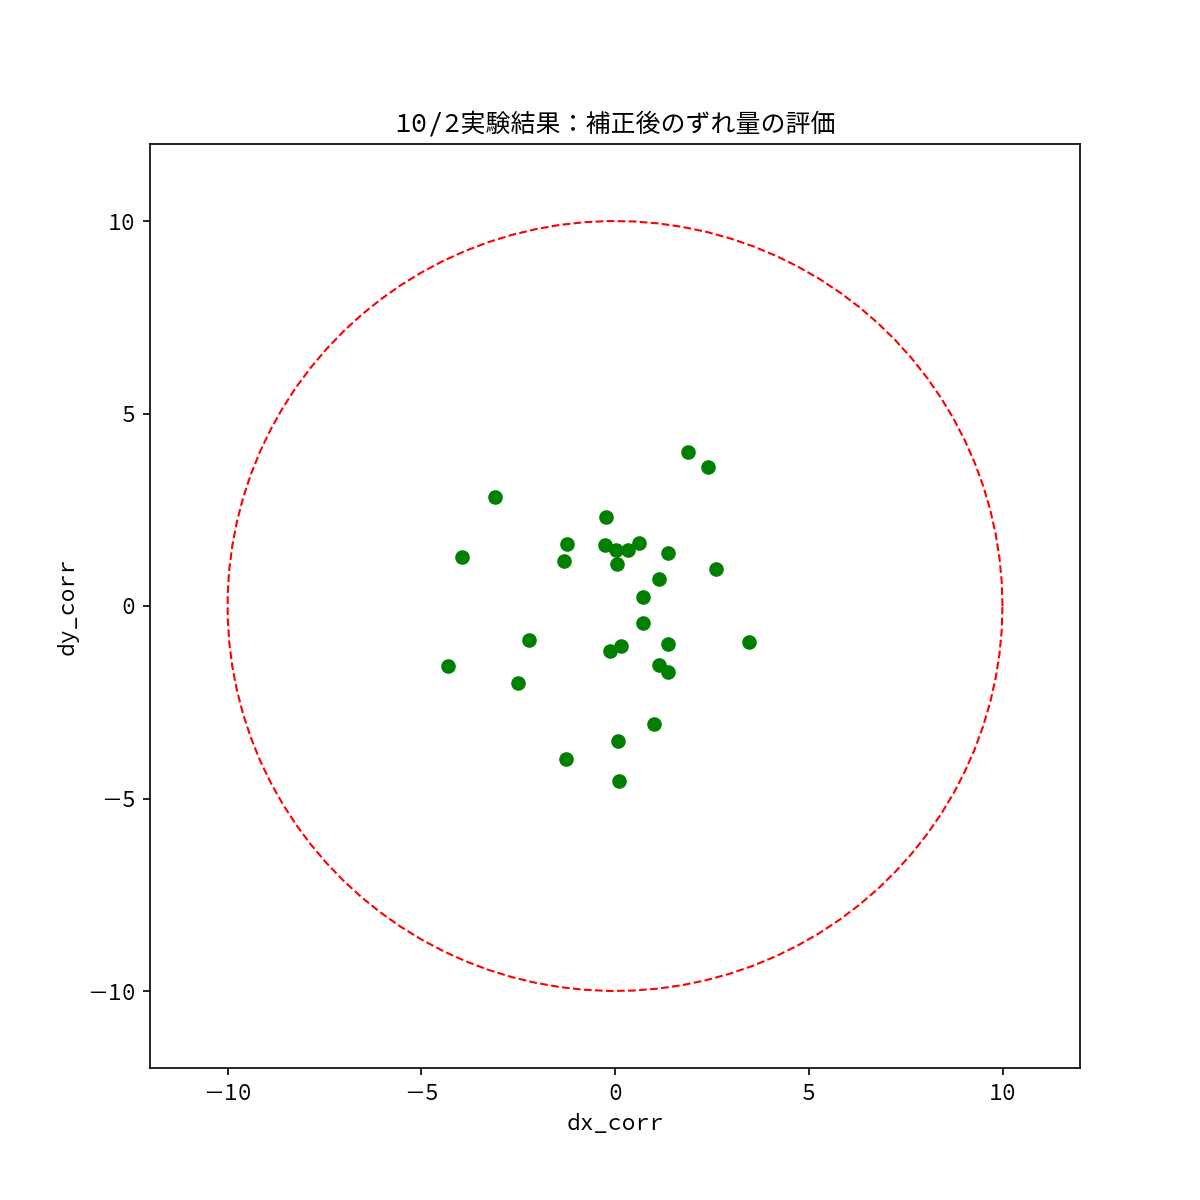

In [45]:
theta = np.linspace(0, 2*np.pi, 100)
tol_dia = 10 # 許容誤差範囲

x = tol_dia * np.cos(theta)
y = tol_dia * np.sin(theta)

fig = plt.figure(figsize=(8,8))
plt.plot(test.dx_corr, test.dy_corr, 'go')
plt.plot(x, y, 'r--', linewidth=1)
plt.xlim(-12,12)
plt.ylim(-12,12)
plt.title('10/2実験結果：補正後のずれ量の評価')
plt.xlabel('dx_corr')
plt.ylabel('dy_corr')
plt.savefig('analysis/result_displace_corr.jpg')
plt.show()

In [46]:
test.to_csv('analysis/test_analysis.csv')